<a href="https://colab.research.google.com/github/RutujaSFulzele/MachineLearning_Project-/blob/main/netflix_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install pandas

In [ ]:
import pandas

In [2]:
pip install pandas-profiling

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 356.2/356.2 kB 25.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 7.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 28.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 6.7 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27080 sha256=a7623b16cb783a147ed3a4a90ae57dec298f1b96bd2b096045a23670532c7abb
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin


NETFLIX DATA ANALYSIS

In [3]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import StandardScaler,LabelEncoder
from matplotlib.colors import ListedColormap
%pylab inline
import seaborn as sns
import plotly.graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
import warnings
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
warnings.simplefilter("ignore")
warnings.simplefilter("ignore")
plt.rcParams["figure.figsize"]=(6,4)


Populating the interactive namespace from numpy and matplotlib


In [ ]:
path_netflix_titles = '/content/drive/MyDrive/Python data set/netflix_titles.csv'



In [ ]:
df_netflix_titles = pd.read_csv(path_netflix_titles)


In [ ]:
df_netflix_titles.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
# Information about data
df_netflix_titles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [ ]:
# Data Cleaning
df_netflix_titles.nunique()

show_id         8807
type               2
title           8807
director        4528
cast            7692
country          748
date_added      1767
release_year      74
rating            17
duration         220
listed_in        514
description     8775
dtype: int64

In [ ]:
df_netflix_titles.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [ ]:
df_netflix_titles[df_netflix_titles['rating'].isnull()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5989,s5990,Movie,13TH: A Conversation with Oprah Winfrey & Ava ...,NaN,"Oprah Winfrey, Ava DuVernay",NaN,"January 26, 2017",2017,NaN,37 min,Movies,Oprah Winfrey sits down with director Ava DuVe...
6827,s6828,TV Show,Gargantia on the Verdurous Planet,NaN,"Kaito Ishikawa, Hisako Kanemoto, Ai Kayano, Ka...",Japan,"December 1, 2016",2013,NaN,1 Season,"Anime Series, International TV Shows","After falling through a wormhole, a space-dwel..."
7312,s7313,TV Show,Little Lunch,NaN,"Flynn Curry, Olivia Deeble, Madison Lu, Oisín ...",Australia,"February 1, 2018",2015,NaN,1 Season,"Kids' TV, TV Comedies","Adopting a child's perspective, this show take..."
7537,s7538,Movie,My Honor Was Loyalty,Alessandro Pepe,"Leone Frisa, Paolo Vaccarino, Francesco Miglio...",Italy,"March 1, 2017",2015,NaN,115 min,Dramas,"Amid the chaos and horror of World War II, a c..."


In [ ]:
df_netflix_titles['rating']=df_netflix_titles['rating'].fillna("Unknown")
df_netflix_titles['rating'].isnull().sum()

0

In [ ]:
df_netflix_titles =df_netflix_titles.drop(['director','cast'] ,axis = 1)
df_netflix_titles.columns

Index(['show_id', 'type', 'title', 'country', 'date_added', 'release_year',
       'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [ ]:
df_netflix_titles[df_netflix_titles['date_added'].isnull()]

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description
6066,s6067,TV Show,A Young Doctor's Notebook and Other Stories,United Kingdom,NaN,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ..."
6174,s6175,TV Show,Anthony Bourdain: Parts Unknown,United States,NaN,2018,TV-PG,5 Seasons,Docuseries,This CNN original series has chef Anthony Bour...
6795,s6796,TV Show,Frasier,United States,NaN,2003,TV-PG,11 Seasons,"Classic & Cult TV, TV Comedies",Frasier Crane is a snooty but lovable Seattle ...
6806,s6807,TV Show,Friends,United States,NaN,2003,TV-14,10 Seasons,"Classic & Cult TV, TV Comedies",This hit sitcom follows the merry misadventure...
6901,s6902,TV Show,Gunslinger Girl,Japan,NaN,2008,TV-14,2 Seasons,"Anime Series, Crime TV Shows","On the surface, the Social Welfare Agency appe..."
7196,s7197,TV Show,Kikoriki,NaN,NaN,2010,TV-Y,2 Seasons,Kids' TV,A wacky rabbit and his gang of animal pals hav...
7254,s7255,TV Show,La Familia P. Luche,United States,NaN,2012,TV-14,3 Seasons,"International TV Shows, Spanish-Language TV Sh...","This irreverent sitcom featues Ludovico, Feder..."
7406,s7407,TV Show,Maron,United States,NaN,2016,TV-MA,4 Seasons,TV Comedies,"Marc Maron stars as Marc Maron, who interviews..."
7847,s7848,TV Show,Red vs. Blue,United States,NaN,2015,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil..."
8182,s8183,TV Show,The Adventures of Figaro Pho,Australia,NaN,2015,TV-Y7,2 Seasons,"Kids' TV, TV Comedies","Imagine your worst fears, then multiply them: ..."


In [ ]:
df_netflix_titles = df_netflix_titles[df_netflix_titles['date_added'].notna()]

In [ ]:
df_netflix_titles['country'].mode()[0]

'United States'

In [ ]:
df_netflix_titles['country'] = df_netflix_titles['country'].fillna(df_netflix_titles['country'].mode()[0])

In [ ]:
df_netflix_titles.isnull().sum()

show_id         0
type            0
title           0
country         0
date_added      0
release_year    0
rating          0
duration        3
listed_in       0
description     0
dtype: int64

In [ ]:
df_netflix_titles['year'] =df_netflix_titles['date_added'].apply(lambda x: x.split(" ")[-1])
df_netflix_titles['year'].head()

0    2021
1    2021
2    2021
3    2021
4    2021
Name: year, dtype: object

In [ ]:
df_netflix_titles['month'] = df_netflix_titles['date_added'].apply(lambda x: x.split(" ")[0])
df_netflix_titles['month'].head()

0    September
1    September
2    September
3    September
4    September
Name: month, dtype: object

In [ ]:
df_netflix_titles['month'].isnull().sum()

0

In [ ]:
df_netflix_titles['listed_in'] = df_netflix_titles['listed_in'].apply(lambda x: x.split(",")[0])
df_netflix_titles['listed_in'].head()

0             Documentaries
1    International TV Shows
2            Crime TV Shows
3                Docuseries
4    International TV Shows
Name: listed_in, dtype: object

In [ ]:
ratings_ages = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'
}

In [ ]:
df_netflix_titles['target_ages'] = df_netflix_titles['rating'].replace(ratings_ages)
df_netflix_titles['target_ages'].unique()

array(['Teens', 'Adults', 'Older Kids', 'Kids', '74 min', '84 min',
       '66 min', 'Unknown'], dtype=object)

In [ ]:
df_netflix_titles['principal_country'] = df_netflix_titles['country'].apply(lambda x: x.split(",")[0])
df_netflix_titles['principal_country']

0       United States
1        South Africa
2       United States
3       United States
4               India
            ...      
8802    United States
8803    United States
8804    United States
8805    United States
8806            India
Name: principal_country, Length: 8797, dtype: object

In [ ]:
df_netflix_titles.columns

Index(['show_id', 'type', 'title', 'country', 'date_added', 'release_year',
       'rating', 'duration', 'listed_in', 'description', 'year', 'month',
       'target_ages', 'principal_country'],
      dtype='object')

In [ ]:
df_netflix_titles.dtypes

show_id              object
type                 object
title                object
country              object
date_added           object
release_year          int64
rating               object
duration             object
listed_in            object
description          object
year                 object
month                object
target_ages          object
principal_country    object
dtype: object

In [ ]:
df_netflix_titles['type'] = pd.Categorical(df_netflix_titles['type'])

df_netflix_titles['target_ages'] = pd.Categorical(df_netflix_titles['target_ages'], categories = ['Kids','Older Kids','Teens','Adults'])
df_netflix_titles['year'] = pd.to_numeric(df_netflix_titles['year'])

In [ ]:
df_netflix_titles.dtypes

show_id                object
type                 category
title                  object
country                object
date_added             object
release_year            int64
rating                 object
duration               object
listed_in              object
description            object
year                    int64
month                  object
target_ages          category
principal_country      object
dtype: object

DATA ANALYSIS

In [ ]:
z = df_netflix_titles.groupby(['rating']).size().reset_index(name='counts')
pieChart = px.pie(z, values='counts', names='rating',
                  title='Distribution of Content Ratings on Netflix',
                  color_discrete_sequence=px.colors.qualitative.Set3)
pieChart.show()

<Axes: xlabel='release_year'>

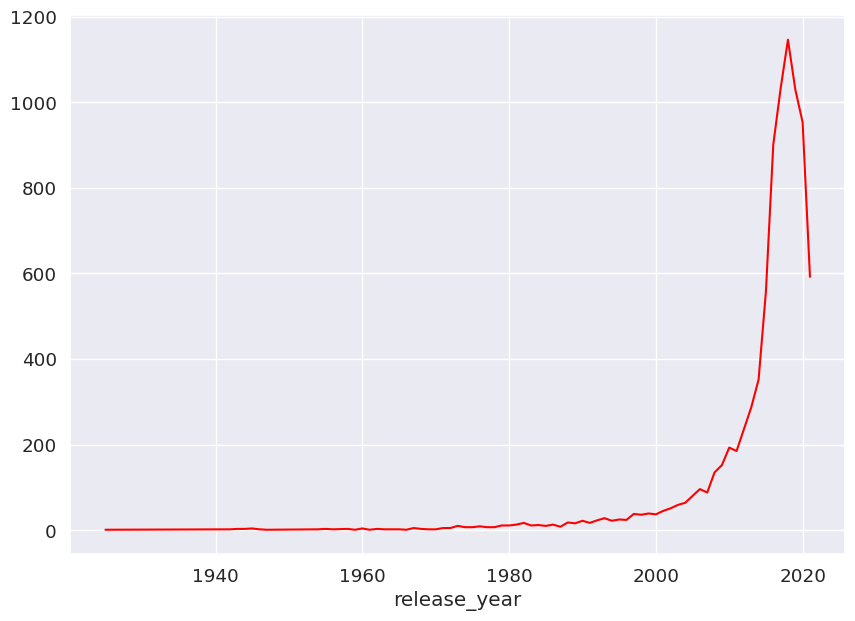

In [ ]:
#The number of contents released  from 2000.
dfy = df_netflix_titles['release_year'].value_counts()
plt.figure(figsize = [10,7])
sns.set(font_scale = 1.2)
sns.lineplot(x =dfy.index, y = dfy.values, color = 'Red')

<Axes: xlabel='year'>

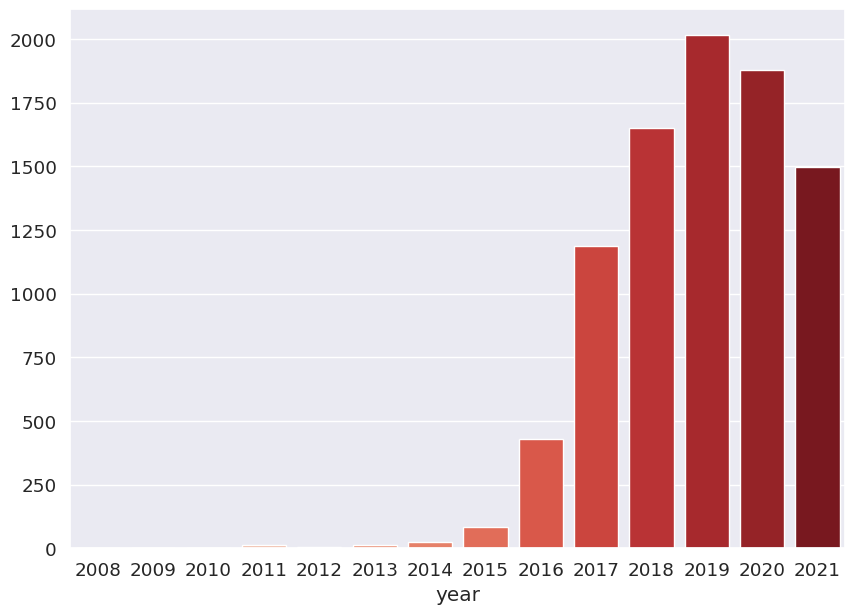

In [ ]:
dfy = df_netflix_titles['year'].value_counts()
plt.figure(figsize = [10,7])
sns.set(font_scale = 1.2)
sns.barplot(x =dfy.index, y = dfy.values, palette = 'Reds')

In [ ]:
#Rating
x = df_netflix_titles['rating'].value_counts()
fig = px.pie(values = x.values,
             names = x.index,
             color_discrete_sequence=px.colors.sequential.Reds)
fig.show()

<Axes: xlabel='rating', ylabel='count'>

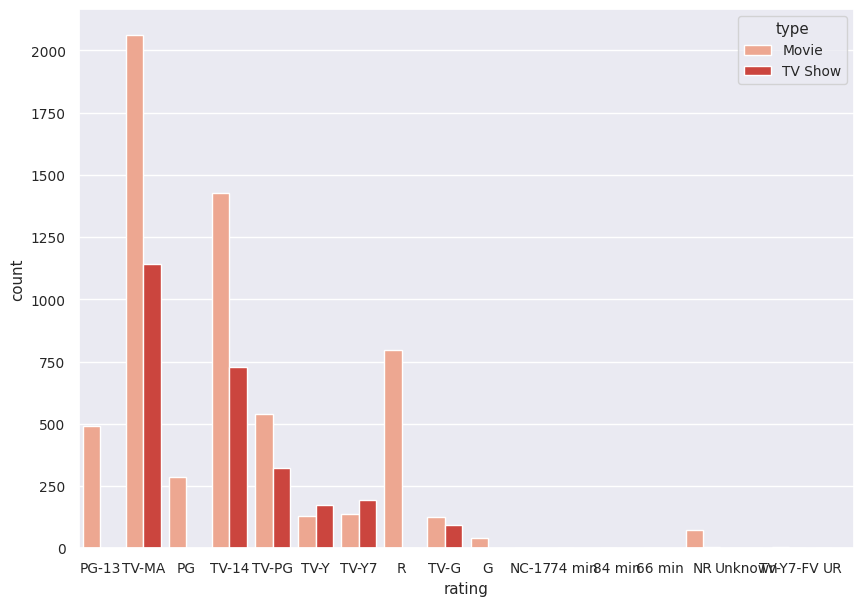

In [ ]:
# Movies vs Tv show rating
plt.figure(figsize = [10,7])
sns.set(font_scale = 0.9)
sns.countplot(data = df_netflix_titles,x = 'rating' ,hue = 'type',palette = 'Reds')

<Axes: xlabel='target_ages', ylabel='count'>

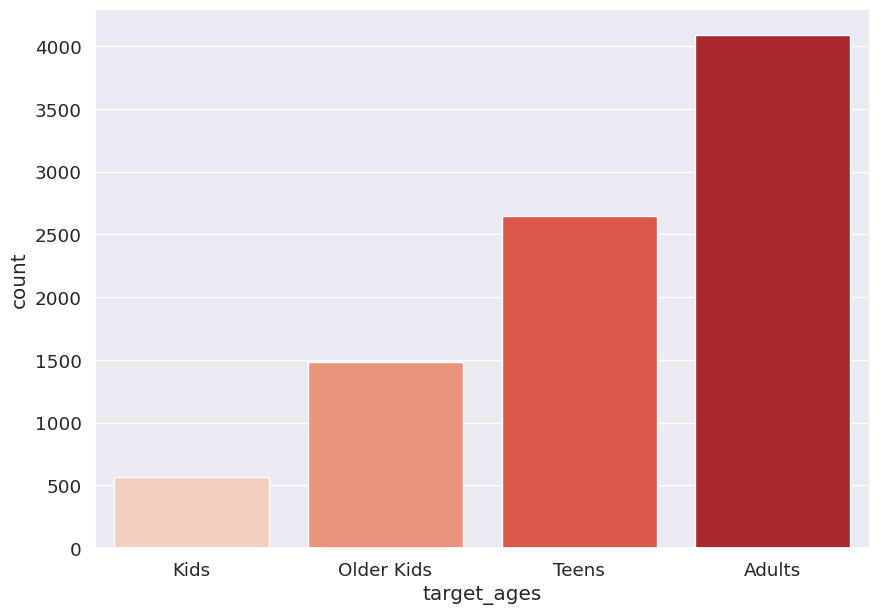

In [ ]:
# age group vise content
plt.figure(figsize = [10,7])
sns.set(font_scale = 1.2)
sns.countplot(data = df_netflix_titles,x = 'target_ages' ,palette = 'Reds')

<Axes: xlabel='target_ages', ylabel='count'>

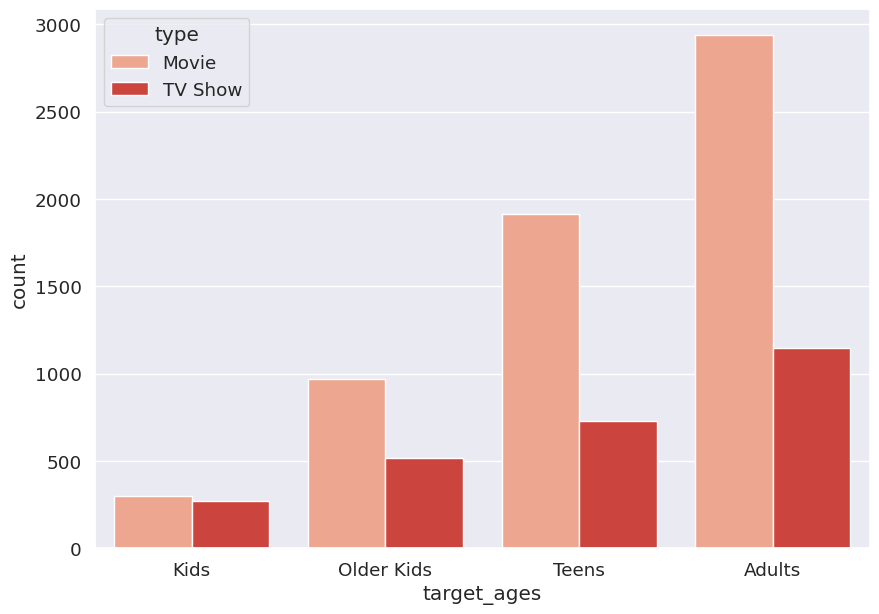

In [ ]:


plt.figure(figsize = [10,7])
sns.set(font_scale = 1.2)
sns.countplot(data = df_netflix_titles,x = 'target_ages' ,hue = 'type',palette = 'Reds')

<Axes: xlabel='rating', ylabel='count'>

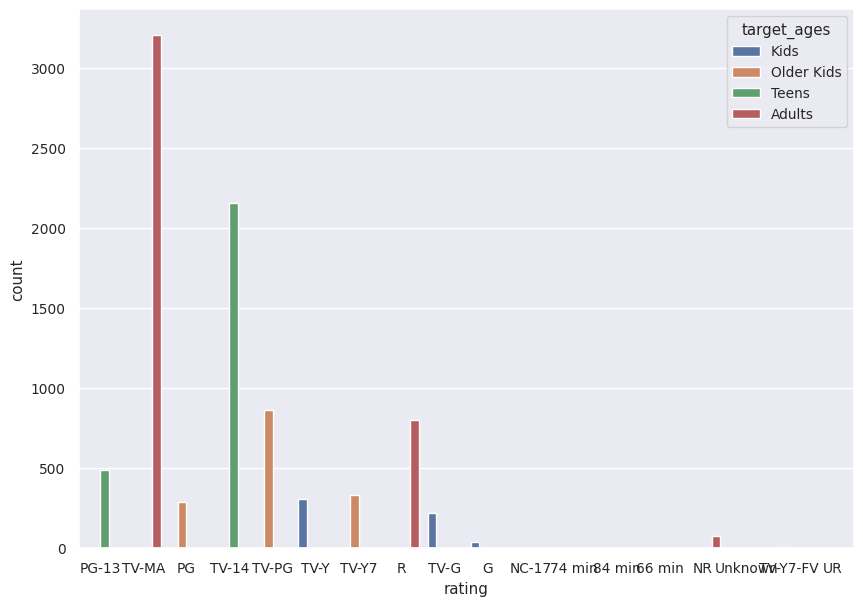

In [ ]:
plt.figure(figsize = [10,7])
sns.set(font_scale = 0.9)
sns.countplot(data = df_netflix_titles, x = 'rating', hue = 'target_ages')

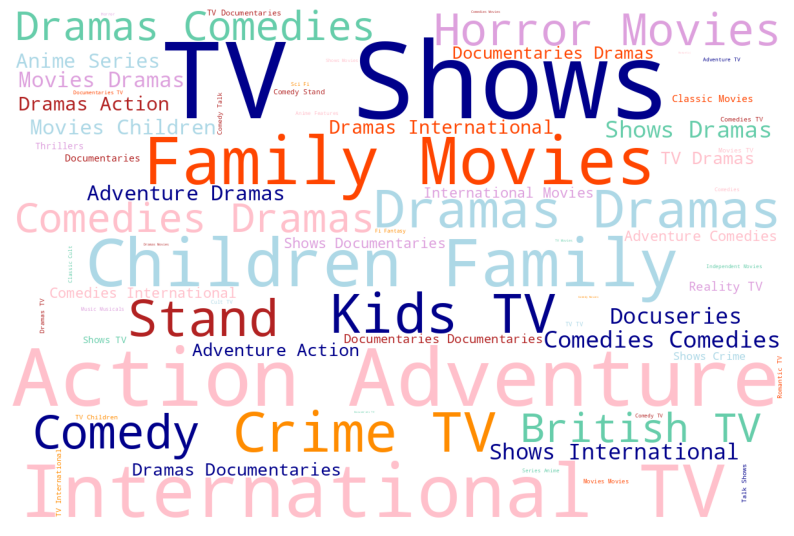

In [ ]:
from wordcloud import WordCloud
from matplotlib import colors

plt.figure(figsize = [10,7])
color_list=  ['DarkBlue','LightBlue','MediumAquamarine',
              'Plum','OrangeRed','FireBrick','Pink','DarkOrange']

colormap = colors.ListedColormap(color_list)

text = str(list(df_netflix_titles['listed_in'])).replace("'","")
plt.rcParams['figure.figsize'] = (15, 15)

wordcloud =  WordCloud(background_color= 'white',width = 1200,height = 800 ,max_words = 120,colormap = colormap ).generate(text)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()